# 計算機実習 問題6.9 - ロジスティック写像のリアプノフ指数

## シミュレーションの目的

系がカオス的かどうか判断する指標として、カオスの重要な性質である初期条件への敏感さを考えることができる。一般に、同一の力学系で異なる初期条件から開始するなら、軌跡差は$n$の関数として変化するであろう。[図1](#fig1)にロジスティック写像における差$|\Delta x_{n}|$と$n$の関係を図示してある。大まかに言って、$\ln |\Delta x_{n}|$は$n$の線形な増加関数であり、このことは、系がカオス的なら軌跡間の距離は指数関数的に大きくなることを意味する。このような発散の特徴は以下に示すリアプノフ(Lyapunov)指数$\lambda$によって記述され、関係式

$$\Delta x_{n}| = |\Delta x_{0}|e^{\lambda n}$$

で定義される。ここで$\Delta x_{n}$は時刻$n$における軌跡間の差である。もしリアプノフ指数$\lambda$が正なら、近接した軌跡間の距離も指数関数的に広がり、系はカオス的であると言える。本シミュレーションではロジスティック写像について、このリアプノフ指数を求めることを目的とする。


[fig1]: figure_test.png "ロジスティック写像における差$|Δx_n|とnの関係"
![figure_test.png][fig1]

リアプノフ指数を測定する素朴な方法は、わずかに異なる初期条件のもとで同じ力学系を時間発展させ、$n$の関数として実際に軌跡の差を測定することである。これらの軌跡が互いに離れていく速さは$x_{0}$の選び方によるので、多くの$x_{0}$の値について離れていく速さを計算する必要がある。$x_{0}$の各値に対して距離を式(1)に合わせ、それから$\lambda$の平均値を求めなければならないので、この方法には手間がかかる。

素朴な方法のさらに重大な限界は、軌跡が0から1までの区間に制限されているような場合に、$n$が十分に大きくなると距離$|\Delta x_{n}|$の値はある一定の大きさ以上には大きくなれなくなってしまうことである。しかし、$\lambda$の計算を可能な限り正確にするために、可能な限り多くの反復により平均を求めたい。これを実現する方法を説明するために、まず式(1)を変形して、$\lambda$を

$$\lambda=\frac{1}{n}\ln \left| \frac{\Delta x_{n}}{\Delta x_{0}} \right|$$

と書く。

過渡的な振る舞いが終わった後の全軌跡のデータを使いたいので、

\begin{equation}
    \frac{\Delta x_{n}}{\Delta x_{0}}=\frac{\Delta x_{1}}{\Delta x_{0}}\frac{\Delta x_{2}}{\Delta x_{1}} \cdots 
    \frac{\Delta x_{n}}{\Delta x_{n-1}}
\end{equation}

という関係に着目すると、

$\lambda$を

\begin{equation}
    \lambda = \frac{1}{n}\sum_{i=0}^{n-1}\ln \left| \frac{\Delta x_{i+1}}{\Delta x_{i}} \right|
\end{equation}

と表すことができる。式(2)は、任意の$i$について$x_{i}$を初期条件として考えることができるということを意味している。

式(2)から、$\lambda$を計算する問題は比$\Delta x_{i+1} / \Delta x_{i}$を求めることに帰着することが分かる。2つの軌跡間の最初の差を可能な限り小さくしたいので、極限$\Delta x_{i} \rightarrow 0$を考えて、微分$dx_{i}$を計算すればよい。例としてロジスティック写像

\begin{equation}
    f(x_{i})=4rx_{i}(1-x_{i})
\end{equation}

の微分は

\begin{equation}
    \frac{dx_{i+1}}{dx_{i}}=f'(x_{i})= 4r(1-2x_{i})
\end{equation}

であるが、問題6.2で行ったようにロジスティック写像の反復を行い、その反復ごとに関係(3)と$x_{i}$の値を使えば、$dx_{i+1}/dx_{i}$を計算することができる。

したがってリアプノフ指数は

\begin{equation}
    \lambda = \lim_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \ln | f'(x_{i}) |
\end{equation}

で与えられることとなる。ここで、式(4)の和は過渡的な振る舞いが終わってからとり始める。$n$を十分に大きく選ぶことを意識するために、式(4)には$n \rightarrow \infty$の極限を明示的に書いた。この方法はアトラクタ上の点に正しく重みを付けていて、軌跡がアトラクタのある特定の領域を多くは訪れない場合に、その領域は式(4)の和にあまり寄与しない。


## 実習課題

### 問題 a：

ロジスティック写像のリアプノフ指数$\lambda$を素朴な方法で計算せよ。$r=0.91$、$x_{0}=0.5$、 $\Delta x_{0}=10^{-6}$とし、$\ln |\Delta x_{n} / \Delta x_{0}|$を$n$に対してプロットせよ。$n$が大きいときには$\ln |\Delta x_{n} / \Delta x_{0}|$はどうなるか。$r=0.91$、$r=0.97$、$r=1.0$について$\lambda$を求めよ。$r$の各値に対する$\lambda$の値は$x_{0}$や$\Delta x_{0}$の選び方に強く依存するか。

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import array as array
import numpy as np
import scipy.optimize as optimize
from IPython.html.widgets import interact
from IPython.html import widgets
from IPython.display import display

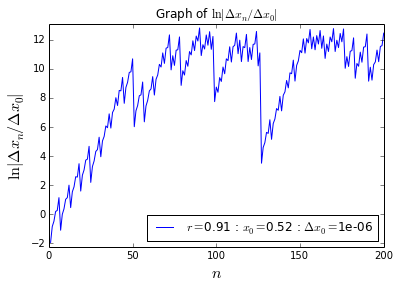

In [6]:
def func(x_i, r):
    return 4.0 * r * x_i * (1 - x_i)

@interact(r={'0.91':0.91, '0.97':0.97, '1.0':1.0}, x0=(0.0, 1.0, 0.01),\
          nmax=(50, 500, 10))
def mapping(r, x0=0.5, nmax=200):  # グラフの描画
    delta_x0 = 0.000001
    x1 = array.array('d')
    x1.append(x0)
    x2 = array.array('d')
    x2.append(x0 + delta_x0)
    lya = array.array('d')
    for count in range(nmax):
        x1.append(func(x1[-1], r))
        x2.append(func(x2[-1], r))
        l = np.log(abs((x2[-1] - x1[-1]) / delta_x0))
        lya.append(l)
    n = range(1, nmax + 1)
    plt.plot(n, lya,
             label=r'$r=$' + str(r) + ' : '
             + r'$x_{0}=$' + str(x0) + ' : '
             + r'$\Delta x_{0}=$' + str(delta_x0)
             )
    plt.gca().set_xlim(0, nmax)
    plt.gca().set_ylim(min(lya) - 0.3, max(lya) + 0.3)
    plt.xlabel(r'$n$', fontsize=16)
    plt.ylabel(r'$\ln | \Delta x_{n} / \Delta x_{0}| $', fontsize=16)
    plt.title('Graph of 'r'$\ln | \Delta x_{n} / \Delta x_{0} |$')
    plt.legend(loc="best")
    plt.show()

このグラフから、$\ln |\Delta x_{n} / \Delta x_{0}|$は$1 \le n \le 100$の領域では、$n$が大きくなるにつれて大まかに見て線形に増加しており、それ以後$n$が大きいときには$\ln |\Delta x_{n} / \Delta x_{0}|$はおよそ11の周囲で振動していることが分かる。これは、素朴な方法の欠点として前述したとおり、$x_{n}$の値に制限があるような今回の場合においては、仮に$\Delta x_{n}$が1となり得たとして、

\begin{equation}
    \max \left( \ln \left| \frac{\Delta x_{n}}{\Delta x_{0}} \right| \right) = \ln \left| \frac{1}{\Delta x_{0}} \right| \\
\end{equation}

であり、今$\Delta x_{0} = 10^{-6}$としていたため、$\max ( \ln | \Delta x_{n} / \Delta x_{0} | ) = 6 \ln 10 \simeq 13.8 $となる。ここで得られたグラフと再び比較すると、$\ln | \Delta x_{n} / \Delta x_{0} |$の極大値は12程度であると分かるので、したがって$\max ( \Delta x_{n} ) $は実際には$10^{-1}$程度であることも推測される。

次に、$r=0.91$、$r=0.97$、$r=1.0$について$\lambda$を求めることにする。基本的な考え方としては、得られたようなグラフを、さまざまな$x_{0}$について試し、グラフで$\ln | \Delta x_{n} / \Delta x_{0} |$が線形に増加している部分の傾きをその$x_{0}$での$\lambda$と見ればよい。$\lambda$の値が$x_{0}$に依存するかどうか確かめるため、また平均値をとって$\lambda$の精度を高めるために、間隔$dx=0.01$おきの$x_{0}$についてそれぞれ$\lambda$を求め、横軸を$x_{0}$、縦軸を$\lambda$としたグラフを描いてみる。

In [22]:
class CalculateLambda():

    def __init__(self, r, delta_x0, dx, nplot):
        self.r = r
        self.delta_x0 = delta_x0
        self.nplot = nplot
        self.n = int((1.0 - self.delta_x0) / dx)
        self.x0 = np.array([(n + 1) * dx for n in range(self.n)])
        self.x0_plus_delta_x0 = self.x0 + self.delta_x0
        self.lyapunovs = np.array([self.lambda_for_x0(x1, x2) for x1, x2
                                   in zip(self.x0, self.x0_plus_delta_x0)
                                   ])

    def lambda_for_x0(self, x1, x2):
        r = self.r               # - localize
        delta_x0 = self.delta_x0  # -
        nplot = self.nplot
        
        def func(x_i):
            return 4.0 * r * x_i * (1.0 - x_i)

        ary1 = array.array('d')
        ary1.append(x1)
        ary2 = array.array('d')
        ary2.append(x2)
        lya = array.array('d')
        lya.append(np.log(abs((ary2[-1] - ary1[-1]) / delta_x0)))
        for count in range(nplot - 1):
            ary1.append(func(ary1[-1]))
            ary2.append(func(ary2[-1]))
            l = np.log(abs((ary2[-1] - ary1[-1]) / delta_x0))
            lya.append(l)

        # -- optimize --

        def fit_func(parameter0, n, lya):
            a = parameter0[0]
            b = parameter0[1]
            residual = lya - (a * n + b)
            return residual

        parameter0 = [1.0, 1.0]
            # initial value of parameters a, b (ln||=a*n+b)
        n = range(1, nplot + 1)
        result = optimize.leastsq(fit_func, parameter0,
                                  args=(np.array(n), np.array(lya))
                                  )
        return result[0][0]

In [23]:
def plot_x0_lambda(r, delta_x0, dx, x0, lyapunovs):
    plt.plot(x0, lyapunovs,
             label='\n' + r'$r=$' + str(r) + '\n'
             + '$\Delta x_{0}\ (:\mathrm{width\ of\ initial\ values})=$'
             + str(delta_x0) + '\n'
             + '$dx\ (:\mathrm{step\ size\ of\ }x_{0})=$'
             + str(dx)
             )


def plot_average_lambda(r, delta_x0, dx, x0, lyapunovs):
    ave_lambda = sum(lyapunovs) / len(x0)
    plt.plot([0, 1], [ave_lambda] * 2,
             label=r'$\mathrm{average\ of\ } \lambda=$' + str(ave_lambda)
             )
    plt.gca().set_xlim(0, 1)
    plt.gca().set_ylim(min(lyapunovs) - 0.1, max(lyapunovs) + 0.1)
    plt.xlabel(r'$x_{0}$', fontsize=16)
    plt.ylabel(r'$\lambda$', fontsize=16)
    plt.title('Lyapunov index')
    plt.legend(loc="best")

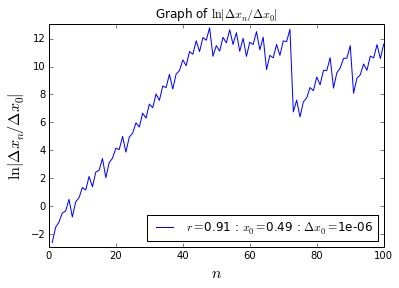

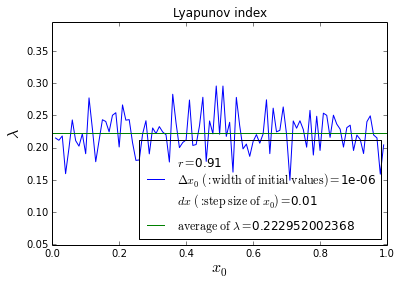

In [27]:
dx = 0.01
delta_x0 = 0.000001
@interact(r={'1.0':1.0, '0.97':0.97, '0.91':0.91},\
          x0=(0., 1., dx), nplot=(10, 100, 5))
def run(r, x0, nplot=50):
    mapping(r, x0, nmax=100)    
    calculate = CalculateLambda(r, delta_x0, dx, nplot)
    plot_x0_lambda(r, delta_x0, dx, calculate.x0, calculate.lyapunovs)
    plot_average_lambda(r, delta_x0, dx, calculate.x0, calculate.lyapunovs)
    plt.show()

グラフからは、$\lambda$の値は$x_{0}$に依存して変動しているが、その取る値は平均値の周辺にまとまって分布しており、なにか決まった関係性があるわけではないということが推測される。しかし、$x_{0}=0.5$での$\lambda$は大きく突出していることに注目する必要があるだろう。

では次に、$\Delta x_{0}$の大きさに関する依存性はどうであろうか。$r=0.97$で固定し、$\Delta x_{0}$を$\Delta x_{0} = 10^{-4}$、$10^{-6}$、$10^{-8}$とした場合のグラフを示す。

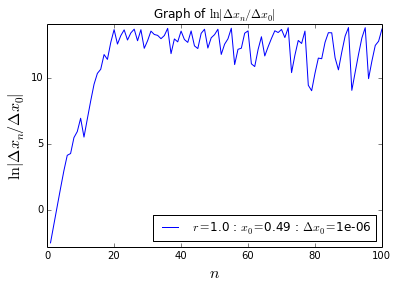

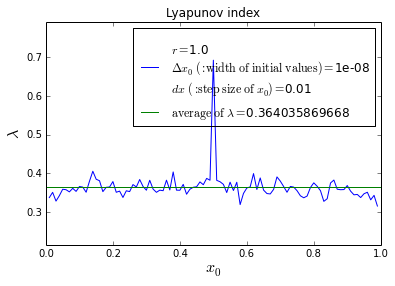

In [31]:
dx = 0.01

@interact(r={'1.0':1.0, '0.97':0.97, '0.91':0.91},\
          delta_x0 = {'10^{-8}': 0.00000001, '10^{-6}': 0.000001, '10^{-4}': 0.0001},\
          x0=(0., 1., dx), nplot=(10, 100, 5))
def run(r, delta_x0, x0, nplot=50):
    mapping(r, x0, nmax=100)
    calculate = CalculateLambda(r, delta_x0, dx, nplot)
    plot_x0_lambda(r, delta_x0, dx, calculate.x0, calculate.lyapunovs)
    plot_average_lambda(r, delta_x0, dx, calculate.x0, calculate.lyapunovs)
    plt.show()

このグラフからもわかるように、$\Delta x_{0}$の大きさは、$\lambda$の値に影響を与えていることがわかる。しかし、これはnplotの選び方が一意でないことと、nplotの大きさが小さいために過渡現象の大きな振動の効果が影響してしまうこととに起因する。これらの考察からも、素朴な方法でリアプノフ指数を求めることの困難さが理解できる。

### 問題 b：

本文で述べたアルゴリズムを用いて、$\Delta r = 0.01$の刻み幅で、$r=0.76$  から$r=1.0$の範囲について、$\lambda$を計算せよ。系がカオス的でないとき、$\lambda$の符号はどうなるか。$\lambda$を$r$に対してプロットし、問題6.2で得られた分岐図と対応させながら、得られた結果を説明せよ。得られた$\lambda$の結果を教科書に示されている図6.9と比較せよ。$\lambda$の符号は分岐図に見られる系の振る舞いとどのような関係があるか。$\lambda<0$の場合には、2つの軌跡は一致し系はカオス的でなくなる。しかし$\lambda= 0$では、軌跡はべき$n$で代数的に離れていく。$r$のどの値に対して$\lambda$は最大になるか。

$x_{0}=0.5$のとき$\Delta r = 0.01$の刻み幅で、$r=0.76$から$r=1.0$の範囲について、$\lambda$を計算し、その結果を横軸$r$、縦軸$\lambda$のグラフにプロットした。

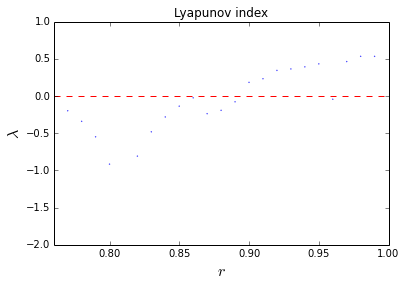

In [32]:
r0 = 0.76
rmax = 1.0
dr = 0.01
ntransient = 1000
n_calc = 100000
x0 = 0.5

nmax = ntransient + n_calc


def lambda_for_r():
    if (rmax - r0) % dr == 0:
        count = int((rmax - r0) / dr) - 1
    else:
        count = int((rmax - r0) / dr)
    r = array.array('f')
    _lambda = array.array('f')
    for n in range(count + 1):
        _r = r0 + dr * n
        r.append(_r)
        _lambda.append(get_lambda_r(func, _r))
    r.append(rmax)
    _lambda.append(get_lambda_r(func, rmax))
    return r, _lambda


def func(x_i, r):
    return 4.0 * r * x_i * (1.0 - x_i)


def get_lambda_r(function, r):
    x = array.array('d')
    x.append(x0)
    for i in np.arange(nmax):
        x.append(function(x[i], r))

    def operate(cx):
        return np.log(abs(4.0 * r * (1.0 - 2.0 * cx)))

    cutted_x = x[ntransient:nmax]
    edited_x = map(operate, cutted_x)
    lambda_r = sum(edited_x) / len(edited_x)
    return lambda_r

r_and_lambda = lambda_for_r()
plt.gca().set_xlim(r0, rmax)
plt.gca().set_ylim(-2.0, 1.0)
plt.scatter(r_and_lambda[0], r_and_lambda[1], color='b', s=0.5, marker='.')
plt.plot([r0, rmax], [0, 0], 'r--')
plt.xlabel(r'$r$', fontsize=16)
plt.ylabel(r'$\lambda$', fontsize=16)
plt.title('Lyapunov index')
plt.show()

また、さらに$\Delta r$を小さくして$\Delta r = 0.0001$としたものと、問題6.2でロジスティック写像について得られた$r$に関する分岐図($x_{0}=0.5$)とを比較したものを示す。

[fig2]: figure_13.png "rの値に対するリアプノフ指数と系の分岐図の比較"
![figure_13.png][fig2]

この図から明らかなように、$r$が負のところでは系はカオス的でなく、窓を形成するような$r$の値においても$\lambda$の値は負の値である。また、図の中で点線で示したように、$\lambda=0$のときは、ちょうど系の挙動の分岐点にあたることが見て取れる。はじめの$\lambda$の定義からも分かるように、この値が負であるということは、初期値がずれていても、十分時間の経過した後には二つの値の間の差はほとんど0に等しくなることを意味し、則ち系の安定性を示している。分岐図だけでは、どの程度の安定性があるかまではわからないが、2つの図を並べて比較すると、$r=0.81$と$r=0.85$では、$r=0.81$の方が系はより安定であることを知ることができる。逆に、$\lambda$の値が正であるところでは、図の分岐図ではカオス的挙動を示していて、$r=1.0$のときに$\lambda$の値が最大となっている。これも先に述べた$\lambda$の意味と確かに一致している。これらのことから、系のカオスの度合いを特徴づける指標としてリアプノフ指数が適当であることが理解できる。

## まとめ

ロジスティック写像のリアプノフ指数を、素朴な方法で、またアルゴリズムを用いて計算することで、系のカオス的であることを表す指標としてのリアプノフ指数について理解を深めることができた。素朴な方法で求める際に、線形近似の適用範囲をどのようにして決めるかという問題に対して有効な方法を見いだせなかったが、そもそも精度よくリアプノフ指数を求めるには違ったアプローチをする必要があるということの理解の助けともなった。問題に対して、素朴な方法で解決するのが難しいと思われる場合、解析的に変形ができないか考えることの重要性を再認識できた。

## 参考文献

ハーベイ・ゴールド,ジャン・トボチニク,石川正勝・宮島佐介訳『計算物理学入
            門』,ピアソン・エデュケーション, 2000.